# Monolingual Embeddings Study

### Counting the number of rows of embeddings

In [1]:
def nb_rows_embeddings(emb_path):
    
    with open(emb_path) as f:
        for i, l in enumerate(f):
            pass
    return i     # We don't count the 0th line

In [2]:
nb = nb_rows_embeddings('vecmap/wiki-news-300d-1M.vec')
print("Number of rows of english monolingualembeddings: {}".format(nb))
# First line of the embedding: 999994 300

Number of rows of english monolingualembeddings: 999994


In [3]:
nb = nb_rows_embeddings('vecmap/cc.eu.300.vec')
print("Number of rows of basque monolingual embeddings: {}".format(nb))
# First line of the embedding: 1824848 300

Number of rows of basque monolingual embeddings: 1824848


### Downloading words

In [4]:
import io
import numpy as np

def load_words(emb_path):
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for line in f:
            word, _ = line.rstrip().split(' ', 1)
            assert word not in word2id, 'word found twice'
            word2id[word] = len(word2id)
    return word2id

In [5]:
src_path = 'vecmap/wiki-news-300d-1M.vec'
tgt_path = 'vecmap/cc.eu.300.vec'

src_word2id = load_words(src_path)
tgt_word2id = load_words(tgt_path)

In [6]:
id2src_word = {i:w for (w,i) in src_word2id.items()}
id2tgt_word = {i:w for (w,i) in tgt_word2id.items()}

In [7]:
for i in range(0,100):
    print(id2src_word[i], end=' ')

, the . and of to in a " : ) that ( is for on * with as it The or was ' 's by from at I this you / are = not - have ? be which ; all his has one their about but an | said more page he your will its so were had also only if time some people like who them other they when Wikipedia article what # just ! any after there would can In her talk use then into up ... we over my out here now because do work 

In [8]:
for i in range(0,100):
    print(id2tgt_word[i], end=' ')

, </s> . " eta : ' ziren ( ) da } zen zeuden bat 1 zuen izan zituzten etxek zuten enpresak zituen ere - 2 dago 2007an ez du dira bere ; link pertsona artean etxebizitza biztanle udalerrian edo de 3 egin / bizi ^ 4 enpresa # beste bar Kategoria horien bakarrik baino bi emakume dituzten gizon etxetan animalia ditu barruko generoko familian familiak zegoen seme-alabak zerbitzu 2009an baina 5 dute urtean lan bestelako eskualdean gehiago egiten 8 den egiteko nagusia hiru kilometro Frantziako udalerria _ udalerri 0 gisa 6 bigarren erabiltzen batzuk hau lau from behar text 

In [9]:
def display_dicts_of_words_beginning_with(src_word, tgt_word, src_word2id=src_word2id, tgt_word2id=tgt_word2id):
    
    src_word_dict = [(w,i) for (w,i) in src_word2id.items() if w.startswith(src_word)]
    tgt_word_dict = [(w,i) for (w,i) in tgt_word2id.items() if w.startswith(tgt_word)]
    print("Length of src_dict beginning with {}: {}".format(src_word, len(src_word_dict)))
    print(src_word_dict)
    print("")
    print("Length of trg_dict beginning with {}: {}".format(tgt_word, len(tgt_word_dict)))
    print(tgt_word_dict)

#### "women" and "emakume"

In [10]:
display_dicts_of_words_beginning_with('woman', 'emakume')

Length of src_dict beginning with woman: 31
[('woman', 992), ('womanhood', 52055), ('womanly', 81183), ('womanizing', 89162), ('womanizer', 100443), ('womans', 114365), ('womanising', 128035), ('womaniser', 150283), ('womankind', 152287), ('woman.', 216253), ('womanist', 238793), ('woman-hating', 266212), ('woman-owned', 267998), ('woman-', 295157), ('womanliness', 338554), ('womanish', 346061), ('womanism', 367866), ('woman-centered', 477397), ('woman-friendly', 494400), ('womanizers', 516549), ('womanʼs', 524065), ('woman-hater', 675899), ('woman-to-woman', 686000), ('woman-child', 744032), ('womanisers', 748589), ('woman-centred', 777472), ('woman-only', 862148), ('woman-like', 873558), ('womanless', 925523), ('woman-led', 934298), ('woman--', 962309)]

Length of trg_dict beginning with emakume: 167
[('emakume', 56), ('emakumeak', 125), ('emakumeen', 2864), ('emakumea', 2960), ('emakumezko', 4311), ('emakumeek', 5666), ('emakumezkoen', 6782), ('emakumearen', 8618), ('emakumeei', 143

#### "portugal" and "portugal"

In [11]:
display_dicts_of_words_beginning_with('portugal', 'portugal')

Length of src_dict beginning with portugal: 1
[('portugal', 112580)]

Length of trg_dict beginning with portugal: 45
[('portugaldar', 7206), ('portugaldarrak', 21956), ('portugaldarrek', 29010), ('portugaldarra', 31860), ('portugaldarren', 56558), ('portugaldarraren', 141744), ('portugalgo', 172592), ('portugaldarrekin', 221899), ('portugaldarrei', 228940), ('portugaldarrarekin', 299522), ('portugalera', 371250), ('portugaletetartzat', 387073), ('portugaleko', 390055), ('portugaletetarra', 400340), ('portugaldar-frantziar', 408236), ('portugaletetar', 421098), ('portugaldarreko', 468811), ('portugaleraz', 468922), ('portugaldarrik', 481720), ('portugaldarrean', 495470), ('portugali', 752220), ('portugaladar', 753896), ('portugalsko', 762956), ('portugaldarrari', 821683), ('portugaletetarrek', 841064), ('portugalujo', 879716), ('portugaldarrez', 883111), ('portugaldarrentzat', 894945), ('portugaldarrarena', 902592), ('portugaldarrera', 921338), ('portugalderrei', 948874), ('portugaldarr

#### "two" and "bi"

In [12]:
display_dicts_of_words_beginning_with("two", "bi")

Length of src_dict beginning with two: 547
[('two', 105), ('two-year', 13505), ('two-thirds', 13669), ('two-day', 24112), ('two-dimensional', 24839), ('two-way', 25690), ('two-time', 28185), ('two-hour', 30779), ('two-week', 31249), ('two-story', 32028), ('two-year-old', 32281), ('two-part', 38308), ('twofold', 47482), ('two-month', 49782), ('two-', 50362), ('two-and-a-half', 52760), ('two-run', 59588), ('two-lane', 60462), ('two-storey', 63310), ('two-bedroom', 63639), ('two-man', 64404), ('two-minute', 64853), ('two-stage', 65374), ('two-step', 67827), ('two-seat', 67837), ('two-fold', 67961), ('two-tier', 68028), ('two-party', 69449), ('two-sided', 70034), ('two-seater', 70785), ('two-faced', 73056), ('two-stroke', 73691), ('two-person', 74114), ('two-level', 78854), ('two-page', 79109), ('two-point', 80140), ('two-legged', 81592), ('two-state', 83312), ('two-piece', 84783), ('twos', 85329), ('two-tone', 86811), ('two-door', 87775), ('two-phase', 87975), ('two-year-olds', 88592), ('

#### "mountain" and "mendi"

In [13]:
display_dicts_of_words_beginning_with('mountain', 'mendi')

Length of src_dict beginning with mountain: 33
[('mountain', 3277), ('mountains', 3913), ('mountainous', 18625), ('mountaineering', 38565), ('mountaineer', 46581), ('mountainside', 54494), ('mountaineers', 54966), ('mountaintop', 56381), ('mountainsides', 107587), ('mountaintops', 119625), ('mountain-top', 175800), ('mountain-biking', 240762), ('mountain-climbing', 262725), ('mountain-building', 288258), ('mountain-bike', 315792), ('mountain-side', 475097), ('mountain-tops', 500320), ('mountain-dwelling', 519303), ('mountaintop-removal', 521642), ('mountain-ash', 601196), ('mountainbike', 614246), ('mountains.', 671595), ('mountaineous', 675552), ('mountain-sized', 743264), ('mountainbiking', 773073), ('mountain-like', 777967), ('mountain-range', 825201), ('mountain-ringed', 825331), ('mountain.', 828586), ('mountainscape', 846200), ('mountain-climber', 926693), ('mountain-sides', 963435), ('mountain-', 982177)]

Length of trg_dict beginning with mendi: 651
[('mendia', 1307), ('mendi',

#### "word" and "hitz"

In [14]:
display_dicts_of_words_beginning_with('word', 'hitz')

Length of src_dict beginning with word: 108
[('words', 479), ('word', 530), ('wording', 3074), ('worded', 13619), ('wordy', 32542), ('wordings', 46116), ('wordplay', 49918), ('word-for-word', 50188), ('word-of-mouth', 55263), ('wordless', 73496), ('wordiness', 85643), ('worden', 87218), ('word-processing', 95290), ('wordmark', 103165), ('wordsmith', 105403), ('wordpress', 108460), ('wordt', 112747), ('word.', 119422), ('words.', 120935), ('wordsmithing', 128739), ('word-final', 143449), ('word-by-word', 150479), ('wordlessly', 158991), ('wordage', 166934), ('word-initial', 175155), ('wordsdeeds', 190271), ('wordsmiths', 191466), ('word-', 200498), ('wordier', 201415), ('wordlist', 203079), ('wordly', 217082), ('words-', 217803), ('word-play', 220997), ('word-processor', 237968), ('word-count', 244571), ('word-initially', 260507), ('wordcount', 263971), ('word-processed', 272773), ('word-based', 273428), ('word-finally', 283010), ('word-level', 288770), ('word-order', 296867), ('wordlis

#### "snow" and "elur"

In [15]:
display_dicts_of_words_beginning_with('snow', 'elur')

Length of src_dict beginning with snow: 131
[('snow', 3272), ('snowfall', 23330), ('snowy', 31319), ('snowboarding', 34069), ('snowstorm', 41063), ('snowball', 43336), ('snowboard', 48532), ('snows', 53762), ('snowmobile', 53921), ('snowflakes', 59216), ('snowpack', 59558), ('snow-covered', 59637), ('snowmobiles', 61929), ('snowstorms', 65520), ('snowboarder', 65743), ('snowflake', 68784), ('snowing', 73155), ('snowman', 75589), ('snowmelt', 76396), ('snowboarders', 76733), ('snowfalls', 83533), ('snowballs', 84440), ('snowmobiling', 90519), ('snowballed', 98956), ('snowed', 99237), ('snowballing', 100632), ('snowshoes', 102570), ('snowshoeing', 104300), ('snowshoe', 110457), ('snowdrops', 111785), ('snow-capped', 112160), ('snowmen', 112556), ('snowbound', 117736), ('snowden', 119562), ('snow-white', 122012), ('snowboards', 139529), ('snowmaking', 142950), ('snowplow', 145097), ('snowdrifts', 145652), ('snowplows', 150784), ('snowmobilers', 160436), ('snowdrop', 169693), ('snowfields'

#### "." and "."

In [16]:
display_dicts_of_words_beginning_with('.', '.')

Length of src_dict beginning with .: 1839
[('.', 2), ('...', 90), ('..', 623), ('....', 705), ('.....', 2280), ('......', 4393), ('.......', 7353), ('........', 10547), ('.com', 13049), ('.........', 13380), ('..........', 15931), ('...........', 19734), ('.jpg', 21891), ('............', 22771), ('.NET', 25410), ('.............', 26655), ('.The', 27406), ('..............', 29312), ('.If', 33930), ('...............', 34677), ('.org', 38183), ('................', 39340), ('.5', 42364), ('.svg', 43493), ('.I', 45095), ('.................', 45910), ('.net', 46874), ('.1', 49819), ('..................', 51186), ('.pdf', 51327), ('.500', 52040), ('.2', 54255), ('.png', 57524), ('...................', 58964), ('.Your', 59054), ('.3', 59825), ('.22', 63321), ('....................', 65787), ('.4', 66751), ('.50', 69217), ('.45', 69607), ('.In', 70043), ('.This', 70343), ('.....................', 71237), ('.and', 72016), ('.-', 72289), ('.We', 73670), ('.Net', 74614), ('.--', 74784), ('.6', 751

#### "Charles" and "Karlos"

In [17]:
display_dicts_of_words_beginning_with('Charles', 'Karlos')

Length of src_dict beginning with Charles: 49
[('Charles', 1697), ('Charleston', 10635), ('Charlestown', 47465), ('Charlesworth', 78005), ('Charlesdrakew', 193243), ('Charles01', 261475), ('CharlesGillingham', 268303), ('Charleson', 288396), ('Charles-François', 294617), ('Charles-Louis', 307816), ('Charlesknight', 321326), ('Charles-Joseph', 338244), ('Charleswood', 342930), ('Charlesbourg', 376877), ('Charles-Henri', 377294), ('Charles-Antoine', 417956), ('Charles-Edwards', 432503), ('Charlestonians', 470462), ('Charles-Philippe', 495732), ('Charles-Marie', 503319), ('Charles-de-Gaulle', 519401), ('Charles-Edouard', 525173), ('Charlesbank', 580017), ('Charles35', 595293), ('CharlesTheBold', 599405), ('Charles-Auguste', 638002), ('Charlesfort', 638416), ('Charles-Alexandre', 645513), ('Charles-Édouard', 661874), ('Charles-Valentin', 667467), ('Charles-Eugène', 684837), ('CharlesMartel', 708608), ('Charles-Ferdinand', 713641), ('Charles-André', 726589), ('Charles-Roux', 737721), ('Char

#### "Africa" and "Afrika"

In [18]:
display_dicts_of_words_beginning_with('Africa', 'Afrika')

Length of src_dict beginning with Africa: 73
[('Africa', 1229), ('African', 2207), ('African-American', 8850), ('Africans', 9961), ('African-Americans', 15404), ('Africana', 83006), ('Africanus', 96177), ('African-born', 147744), ('Africanist', 178551), ('African-Caribbean', 184862), ('Africanized', 188339), ('Africain', 198760), ('Africa-related', 201833), ('Africaine', 206597), ('Africa.', 226616), ('African-', 254309), ('Africanists', 272769), ('African-based', 280555), ('Africare', 293943), ('Africa-based', 305155), ('Africains', 306708), ('African-Canadian', 329805), ('African-led', 348628), ('Africano', 351584), ('AfricaTanz', 362221), ('Africa-focused', 363492), ('Africas', 371238), ('Africanism', 380227), ('Africa-', 380550), ('African-style', 415960), ('African-inspired', 417750), ('Africaines', 420164), ('African-descended', 451584), ('Africanization', 461031), ('Africanness', 491174), ('Africa-wide', 518934), ('Africa-born', 518944), ('African-derived', 519644), ('Africa.The

### Downloading embeddings

In [19]:
import io
import numpy as np

def load_embeddings(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for line in f:
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [26]:
src_path = 'vecmap/wiki-news-300d-1M.vec'
tgt_path = 'vecmap/cc.eu.300.vec'

nmax = 20000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_embeddings(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_embeddings(tgt_path, nmax)

### Study of some embeddings

In [21]:
print(src_word2id["two"])
print(src_embeddings[105])

105
[ 1.340e-02  1.710e-02 -3.440e-02  9.120e-02 -1.400e-02  8.500e-03
  3.600e-02  5.880e-02 -5.990e-02 -1.020e-02 -3.000e-04  8.000e-04
 -3.700e-02  2.880e-02 -1.480e-02  5.900e-03 -8.030e-02 -1.030e-02
 -1.854e-01  8.700e-02  5.660e-02  3.980e-02 -4.500e-03 -7.120e-02
  9.650e-02 -4.160e-02  2.200e-03  9.710e-02  9.090e-02 -1.080e-02
 -6.700e-03 -5.290e-02 -8.700e-02  4.780e-02  4.120e-02  2.840e-02
  9.250e-02 -1.644e-01  1.386e-01  3.170e-02 -9.500e-03  4.600e-02
  5.860e-02 -6.370e-02 -4.620e-02  5.760e-02  3.070e-02 -1.950e-02
  1.730e-02  2.800e-02  9.070e-02  6.620e-02 -6.762e-01  1.850e-02
  3.850e-02  9.860e-02 -4.800e-03  6.090e-02 -1.460e-02 -1.320e-02
 -5.630e-02  5.450e-02  5.430e-02 -5.980e-02  2.640e-02 -9.470e-02
 -1.810e-02 -1.130e-02  1.910e-02 -1.660e-02  3.640e-02  3.550e-02
 -2.480e-02 -7.120e-02  6.800e-03 -3.630e-02  1.256e-01 -3.030e-02
 -3.800e-03 -1.685e-01  2.700e-03 -9.710e-02  2.220e-02 -2.922e-01
  4.780e-02  1.493e-01 -6.510e-02 -8.400e-03  6.770e-02  3

In [22]:
print(tgt_word2id["bi"])
print(tgt_embeddings[55])

55
[ 4.2100e-02 -1.9700e-02  8.2700e-02 -1.4260e-01 -3.6200e-02 -2.2090e-01
  2.1650e-01  9.0000e-03  1.0590e-01 -4.2500e-02  6.0700e-02 -8.0000e-04
  4.3500e-02 -6.2000e-03  6.2800e-02  5.4700e-02  1.1290e-01  1.5200e-02
 -1.0500e-02  1.7180e-01  1.2138e+00 -9.8600e-02  6.6700e-02 -8.1400e-02
  2.3240e-01 -7.6300e-02 -2.0000e-02  7.6700e-02  2.0740e-01 -5.1900e-02
 -1.0080e-01  3.3800e-02  9.2100e-02  3.5600e-02  1.4170e-01 -5.6500e-02
  2.7200e-02 -3.3100e-02  1.0990e-01  4.0200e-02 -3.8500e-02 -1.2000e-03
  2.3500e-02 -6.4900e-02 -8.9700e-02 -5.5600e-02 -3.5720e-01  1.0930e-01
  1.5800e-02 -3.3500e-02 -2.0900e-02  9.4700e-02 -8.3000e-03 -2.1340e-01
  5.5000e-03  6.5400e-02  9.3000e-02  2.4800e-02  8.4200e-02  1.0490e-01
 -3.2900e-02 -4.4200e-02 -5.1200e-02  4.4200e-02 -3.9900e-02 -8.4200e-02
  5.7800e-02  6.2000e-03 -5.8100e-02 -1.0500e-02  4.5700e-02  9.4900e-02
 -5.9200e-02 -2.6800e-02 -7.2800e-02 -1.4500e-02  4.0400e-02 -1.5000e-01
  5.3100e-02  3.7900e-02  5.9300e-02 -1.0080e-01

In [25]:
print(src_embeddings[75000])

[ 2.077e-01 -2.490e-02  1.067e-01 -6.430e-02 -2.260e-02  1.860e-02
  1.322e-01 -1.380e-02 -1.604e-01 -1.137e-01  8.940e-02  4.100e-02
 -1.536e-01  6.540e-02 -3.610e-02 -1.851e-01 -6.000e-04  1.384e-01
  6.220e-02 -8.200e-02 -1.458e-01  4.290e-02 -1.743e-01  7.430e-02
 -3.270e-02 -1.344e-01 -1.076e-01  1.166e-01  2.700e-03  8.720e-02
 -2.339e-01 -9.440e-02  2.374e-01  5.370e-02  9.330e-02  1.230e-01
  5.600e-02  2.135e-01 -1.690e-01 -1.906e-01 -2.125e-01  1.140e-02
  4.740e-02  6.030e-02 -1.196e-01 -7.740e-02  3.020e-02  1.710e-01
  1.685e-01 -4.140e-02  2.480e-02  1.553e-01 -6.911e-01 -1.800e-03
 -1.420e-02 -1.061e-01 -8.780e-02  1.563e-01  2.270e-02 -1.483e-01
 -7.100e-02  6.870e-02  1.712e-01 -2.510e-02  6.040e-02 -4.460e-02
 -1.193e-01 -4.190e-02 -6.410e-02 -4.200e-03  8.640e-02 -7.330e-02
  4.030e-02 -2.415e-01 -1.010e-02  1.550e-02 -7.720e-02  3.010e-02
  5.150e-02 -8.600e-03  1.300e-01  3.990e-02  1.480e-02 -3.045e-01
  3.360e-02 -2.316e-01 -1.468e-01 -1.860e-02 -4.506e-01  2.780

## Similarity distributions 

In [27]:
def length_normalize(array):
    norms = np.sqrt(np.sum(array**2, axis=1))
    norms[norms == 0] = 1
    array /= norms[:, np.newaxis]

def mean_center(array):
    avg = np.mean(array, axis=0)
    array -= avg
    
def normalize(array, actions):
    for action in actions:
        if action == 'unit':
            length_normalize(array)
        elif action == 'center':
            mean_center(array)

#### Warning : the following cell displays a Memory exception when nmax in cell [22] equals 100000, put nmax=20000

In [28]:
u, s, vt = np.linalg.svd(src_embeddings, full_matrices=False)
xsim = (u*s).dot(u.T)
xsim.sort(axis=1)
normalize(xsim, ['unit','center','unit'])

In [29]:
print(u.shape, s.shape, vt.shape)

(20000, 300) (300,) (300, 300)


In [30]:
u, s, vt = np.linalg.svd(tgt_embeddings, full_matrices=False)
zsim = (u*s).dot(u.T)
zsim.sort(axis=1)
del u, s, vt
normalize(zsim, ['unit','center','unit'])

In [31]:
print(zsim.shape)

(20000, 20000)


### Density curves

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

def similarity_dist_of(src_word, tgt_word, hist=False, xsim=xsim, zsim=zsim):
    src_dist = xsim[src_word2id[src_word]]
    tgt_dist = zsim[tgt_word2id[tgt_word]]
    
    sns.set_style('darkgrid')
    plt.axis([-0.025, 0.025, 0, 300])
    #plt.title("EN "+src_word+" - EU "+ tgt_word)
    sns.distplot(src_dist, hist=hist)
    sns.distplot(tgt_dist, hist=hist)

In [33]:
print(src_word2id["two"])
print(tgt_word2id["bi"])

105
55


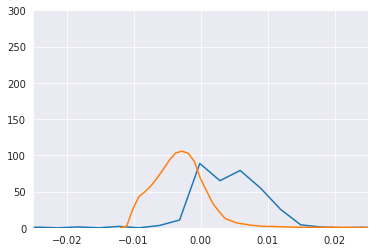

In [34]:
similarity_dist_of("two","bi")

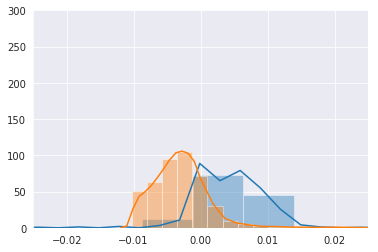

In [35]:
similarity_dist_of("two","bi", True)

In [36]:
print(src_word2id["new"])
print(tgt_word2id["berri"])

108
391


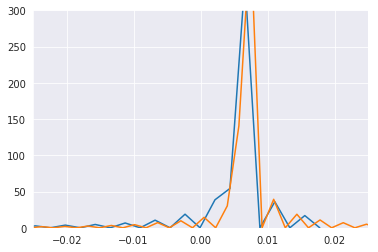

In [37]:
similarity_dist_of("new","berri")

In [38]:
print(src_word2id["gold"])
print(tgt_word2id["urre"])

1829
6090


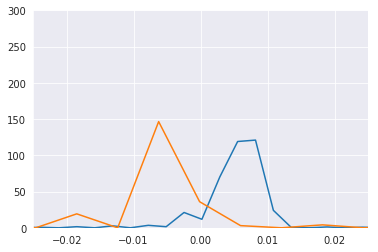

In [39]:
similarity_dist_of("gold","urre")

In [40]:
print(src_word2id["why"])
print(tgt_word2id["zergatik"])

248
3737


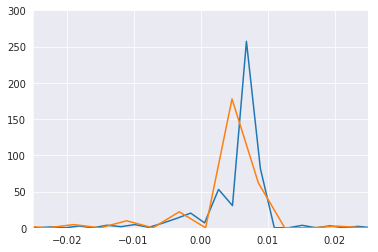

In [41]:
similarity_dist_of("why","zergatik")

In [42]:
print(src_word2id["women"])
print(tgt_word2id["emakume"])

269
56


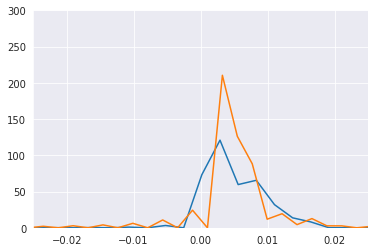

In [43]:
similarity_dist_of("women","emakume")

In [44]:
print(src_word2id["mountain"])
print(tgt_word2id["mendi"])

3277
1446


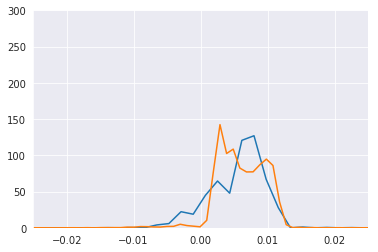

In [45]:
similarity_dist_of("mountain","mendi")

In [46]:
print(src_word2id["name"])
print(tgt_word2id["izen"])

130
474


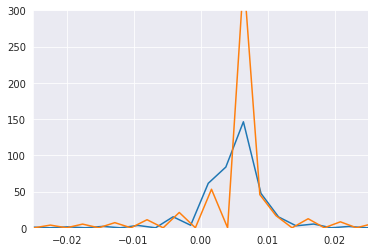

In [47]:
similarity_dist_of("name","izen")

In [48]:
print(src_word2id["our"])
print(tgt_word2id["gure"])

106
424


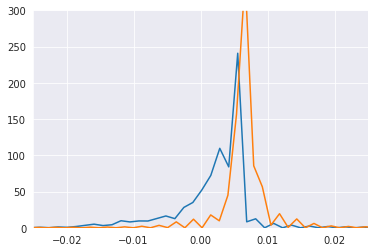

In [49]:
similarity_dist_of("our","gure")

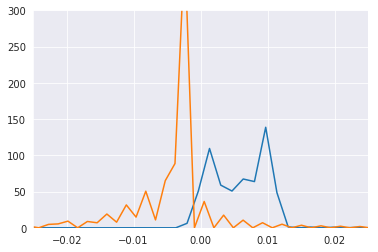

In [50]:
similarity_dist_of("meat","haragi")

In [51]:
print(src_word2id["wrong"])
print(tgt_word2id["gaizki"])

567
3433


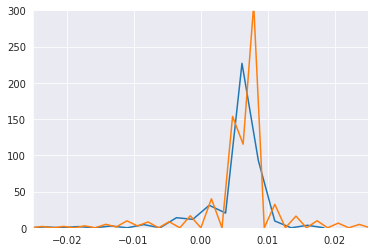

In [52]:
similarity_dist_of("wrong","gaizki")

In [53]:
print(src_word2id["eye"])
print(tgt_word2id["begi"])

2352
3767


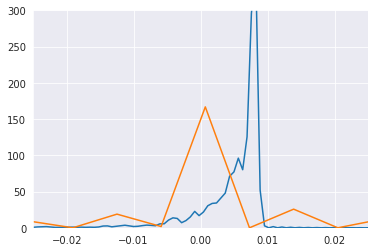

In [54]:
similarity_dist_of("eye", "begi")

In [55]:
print(src_word2id["food"])
print(tgt_word2id["janari"])

606
310


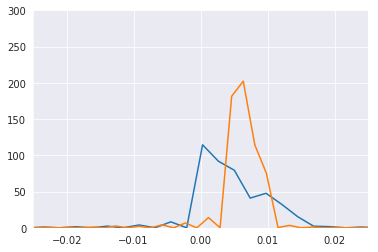

In [56]:
similarity_dist_of("food", "janari")

In [57]:
print(src_word2id["precise"])
print(tgt_word2id["zehatz"])

5178
2907


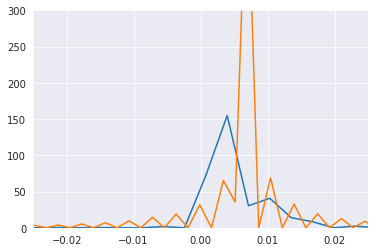

In [58]:
similarity_dist_of("precise", "zehatz")